In [2]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt
from tqdm import tqdm
from linearization import create_B, create_C, get_Psi, PsiCalculator

Plot vectorfield for discretization n=2:

In [ ]:
psicalc = PsiCalculator(n=2)
X = []
Y = []
U = []
V = []
for f1 in np.linspace(0,2.,15):
    for g1 in np.linspace(0.,2.,15):
        Psi = psicalc.computeReducedAt(np.array([[f1]]), np.array([[g1]]))
        U.append(Psi['Psif'][0])
        V.append(Psi['Psig'][0])
        X.append(f1)
        Y.append(g1)
plt.quiver(X,Y,U,V)
plt.show()

Run discretized replicator dynamics

In [ ]:
n = 22
psicalc = PsiCalculator(n)

f = 0.1 * np.ones((n,1))
f[0:1,0] = np.ones((1,))
f = f * n/f.sum()
g = 0.1 * np.ones((n,1))
g[0:1,0] = np.ones((1,))
g = g * n/g.sum()
n_rounds = 30000
h = 0.1
gradient_norms = []
f_mins = []
grad_mins = []
for k in tqdm(range(n_rounds)):
    Psi = psicalc.computeAt(f,g)
    f_mins.append(f.min())
    grad_mins = Psi['Psif'].min()
    gradient_norms.append(np.linalg.norm(Psi['Psif']))
    f[:,0] += h*Psi['Psif']
    g[:,0] += h*Psi['Psig']
#plt.plot(f_mins)
#plt.plot(grad_mins)
plt.stairs(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
plt.show()

Gradient for very 'flat' strategies

In [ ]:
n = 10
psicalc = PsiCalculator(10)
f = 0.01 * np.ones((n,1))
f[0:1,0] = np.ones((1,))
g = 0.01 * np.ones((n,1))
g[0:1,0] = np.ones((1,))
Psi = psicalc.computeAt(f,g)
print(Psi['Psif'][0])
print(Psi['Psif'][1])
plt.stairs(values=Psi['Psif'].flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
plt.show()

Animation

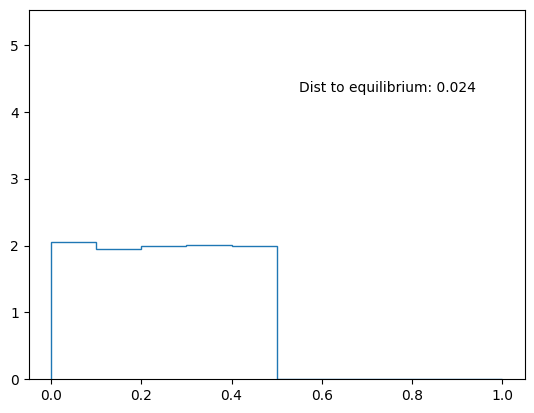

In [12]:
from matplotlib import animation
%matplotlib inline

n = 10
psicalc = PsiCalculator(n)

equilibrium = np.zeros((n,1))
for i in range(int(n/2)):
    equilibrium[i,0] = 1.
equilibrium = equilibrium * n/equilibrium.sum()

f = 0.1 * np.ones((n,1))
f[0:1,0] = np.ones((1,))
f = f * n/f.sum()
g = 0.1 * np.ones((n,1))
g[0:1,0] = np.ones((1,))
g = g * n/g.sum()
n_rounds = 2500
iterations_per_round = 4
h = 0.1

fig = plt.figure()
ax = plt.subplot()
dist_text = ax.text(0.55,4.3,"Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(f-equilibrium)))
line = ax.stairs(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))

def drawframe(it):
    for _ in range(iterations_per_round):
        Psi = psicalc.computeAt(f,g)
        f[:,0] += h*Psi['Psif']
        g[:,0] += h*Psi['Psig']
    line.set_data(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    dist_text.set_text("Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(f-equilibrium)))
    return (line,)

anim = animation.FuncAnimation(fig, drawframe, frames = n_rounds, interval=10, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())